In [11]:
# import bibliotek
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import randint
import math

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [4]:
# wczytanie danych
df = pd.read_csv("/Users/iMac/Documents/Customer propensity/archive/training_sample.csv")
df.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

<Axes: >

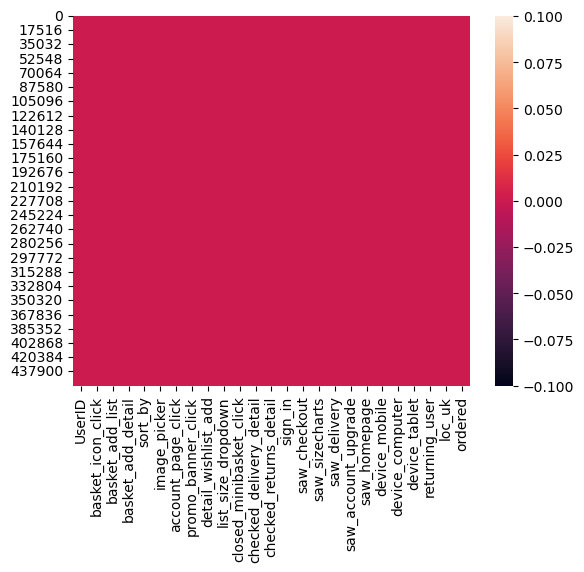

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.duplicated().sum()

0

Dataset jest dobrze oczyszczony i nie ma w nim brakujących oraz zduplikowanych warości

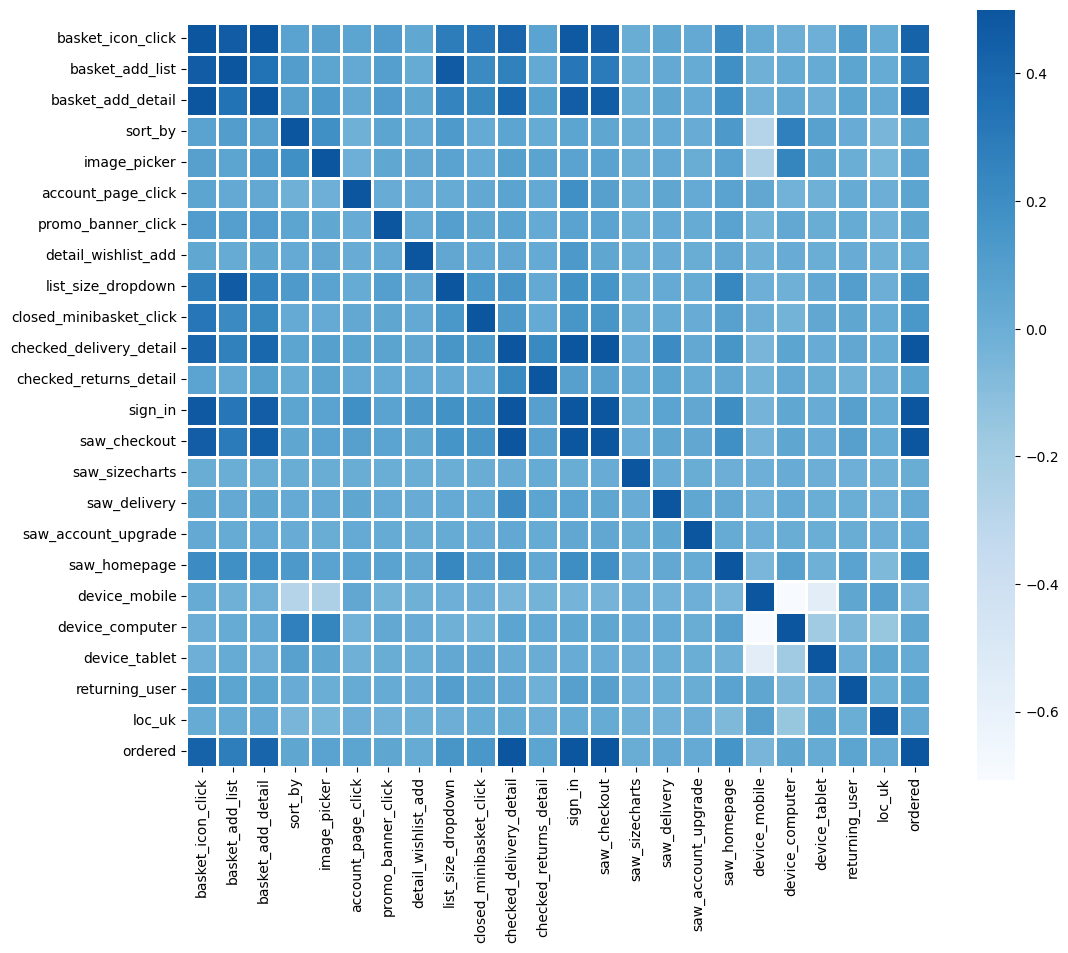

In [9]:
corr = df.drop("UserID", axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, vmax=0.5, center=0,
            square=True, linewidths=2, cmap='Blues')
plt.show()

In [10]:
df.drop("UserID", axis=1).corr()['ordered'].sort_values()

device_mobile             -0.042907
saw_sizecharts             0.007548
device_tablet              0.016939
detail_wishlist_add        0.023516
saw_account_upgrade        0.025857
saw_delivery               0.031461
loc_uk                     0.031643
device_computer            0.049208
sort_by                    0.054636
promo_banner_click         0.056533
account_page_click         0.057279
checked_returns_detail     0.059484
returning_user             0.060295
image_picker               0.071492
closed_minibasket_click    0.140011
list_size_dropdown         0.154867
saw_homepage               0.157778
basket_add_list            0.287666
basket_add_detail          0.414420
basket_icon_click          0.428334
sign_in                    0.665556
saw_checkout               0.708986
checked_delivery_detail    0.798720
ordered                    1.000000
Name: ordered, dtype: float64

Korelacja względem targetu wskazuje, że jest kilka silnie skorelowanych parametrów jak: sign_in, saw_checkout, checked_delivery_detail. Na ten moment nie będziemy ich usuwać z datasetu. 

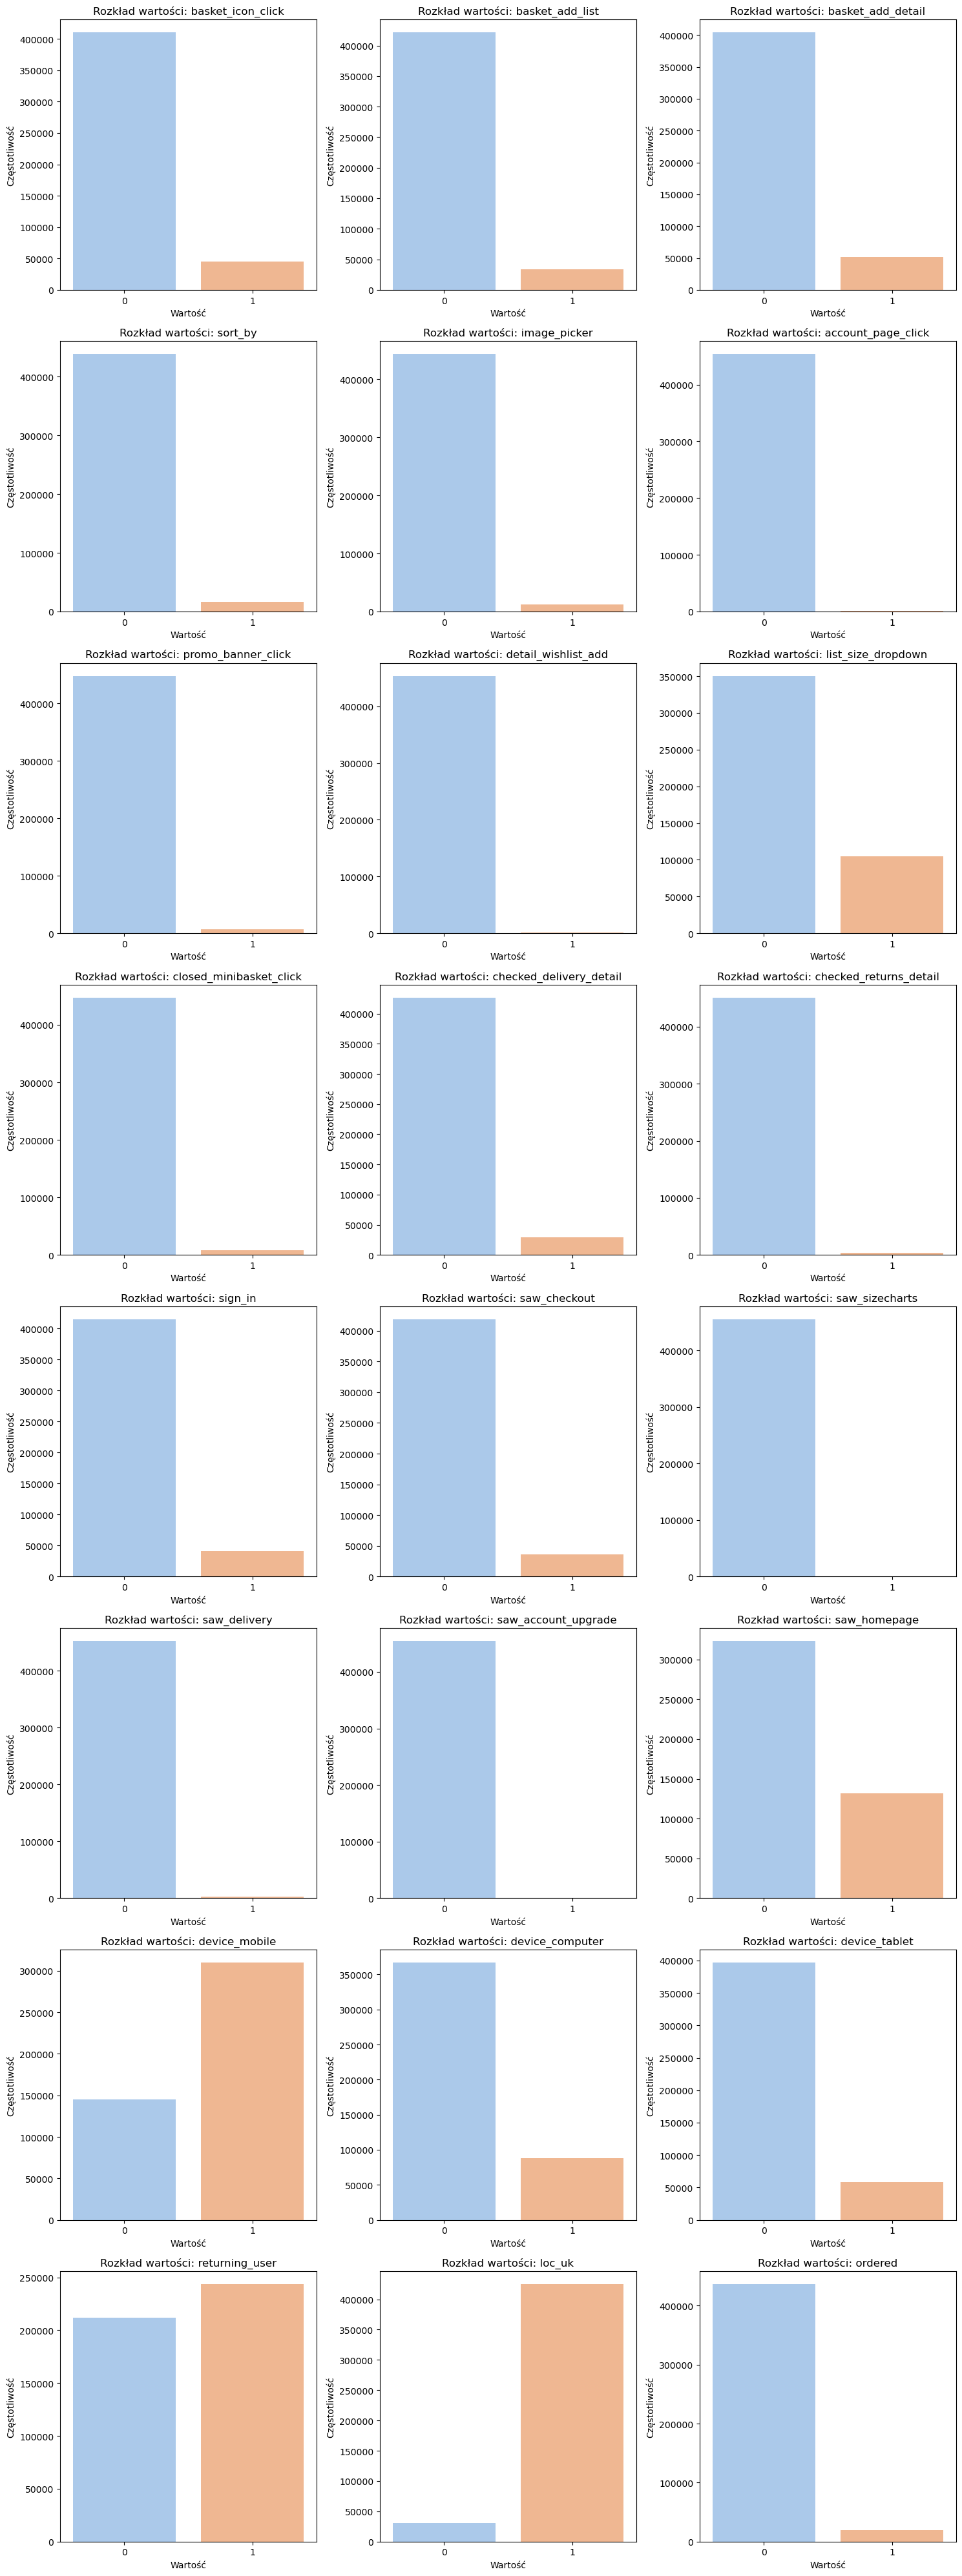

In [14]:
# Ustawienia siatki
columns = 3  # Liczba kolumn w układzie
num_plots = len(df.drop('UserID', axis=1).columns)  # Liczba kolumn do wyświetlenia
rows = math.ceil(num_plots / columns)  # Liczba wierszy potrzebna do wyświetlenia wszystkich wykresów

# Tworzenie subplotów
fig, axes = plt.subplots(rows, columns, figsize=(15, rows * 5), squeeze=False)

# Iteracja po kolumnach i rysowanie wykresów
for i, column in enumerate(df.drop('UserID', axis=1).columns):
    row, col = divmod(i, columns)  # Obliczanie wiersza i kolumny w siatce
    sns.countplot(x=column, data=df, ax=axes[row, col], palette='pastel', hue=column, dodge=False, legend=False)
    
    # Ustawienia wykresu
    axes[row, col].set_title(f'Rozkład wartości: {column}')
    axes[row, col].set_xlabel('Wartość')
    axes[row, col].set_ylabel('Częstotliwość')

# Wyłączanie pustych osi, jeśli jest ich więcej niż wykresów
for i in range(num_plots, rows * columns):
    row, col = divmod(i, columns)
    axes[row, col].axis('off')

# Dostosowanie układu
plt.tight_layout()
plt.show()

Analizując rozkład targetu w poszczególnych parametrach, widzimy, ze rozkład w większości jest mało zbalansowany. Jedynym parametrem, który jest blisko balansu to returning_user, co wskazuje na fakt, że duża część klientów to użytkownicy powracający. Dodatkowo widzimy, że:
1. Większość użytkowników jest z UK
2. Większość użytkowników dokonuje zakupu na urządzeniach mobilnych

EDA na tym się kończy, dataset jest ju przygotowany wykorzystując One Hot Encoding.

Budowanie modeli

In [16]:
# usuwanie niepotrzebnych kolumn
pred = df.drop(['ordered','UserID'], axis=1)
# wyznaczanie targetu
target = df.ordered

In [17]:
# rozdzielanie datasetu na trening i test
X_train, X_test, y_train, y_test = train_test_split(
    pred,
    target,
    test_size=0.33,
    random_state=42)

In [39]:
# trenowanie modelu Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [19]:
# trenowanie modelu Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# trenowanie modelu Naive Bayes
nvb_model=GaussianNB()
nvb_model.fit(X_train,y_train)

GaussianNB()

In [21]:
# trenowanie modelu SVM
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [22]:
# trenowanie modelu KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
# słownik z modelami i ich nazwami
models_dict = {
    "Logistic Regression": lr_model,
    "Random Forest": random_forest_model,
    "Naive Bayes": nvb_model,
    "SVM": svm_model,
    "KNN": knn_model
}


In [25]:
# pętla do wyliczania metryk
for model_name, model in models_dict.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print(f"Model: {model_name}")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print("\n**************\n")

Model: Logistic Regression
  Accuracy: 0.9931
  Precision: 0.9938
  Recall: 0.9931

**************

Model: Random Forest
  Accuracy: 0.9929
  Precision: 0.9935
  Recall: 0.9929

**************

Model: Naive Bayes
  Accuracy: 0.9882
  Precision: 0.9906
  Recall: 0.9882

**************

Model: SVM
  Accuracy: 0.9930
  Precision: 0.9938
  Recall: 0.9930

**************

Model: KNN
  Accuracy: 0.9918
  Precision: 0.9924
  Recall: 0.9918

**************



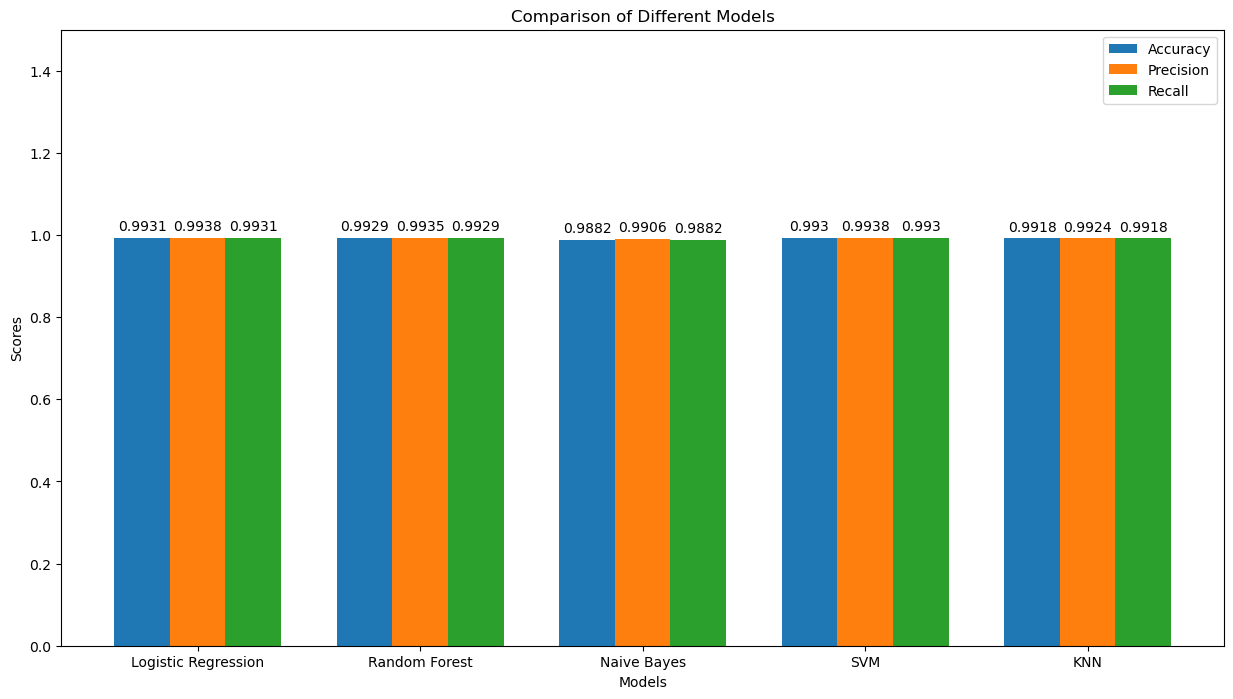

In [26]:
# przygotowanie danych do wizualizacji
models = []
accuracies = []
precisions = []
recalls = []

for model_name, model in models_dict.items():
    y_pred = model.predict(X_test)
    models.append(model_name)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))

# przygotowanie danych do wykresu
x = np.arange(len(models))  # Lokalizacje etykiet
width = 0.25  # Szerokość słupków

# tworzenie wykresu
fig, ax = plt.subplots(figsize=(15, 8))

bars1 = ax.bar(x - width, accuracies, width, label='Accuracy')
bars2 = ax.bar(x, precisions, width, label='Precision')
bars3 = ax.bar(x + width, recalls, width, label='Recall')

# dodanie etykiet i tytułów
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# funkcja do dodawania etykiet nad słupkami
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{round(height, 4)}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Przesunięcie pionowe
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(bars1)
autolabel(bars2)
autolabel(bars3)

plt.ylim(0, 1.5)  # Dostosowanie osi Y
plt.show()

Analiza wskaźników Accuray, Precision i Recall pokazuje, że każdy z modeli jest bardzo dokładny.

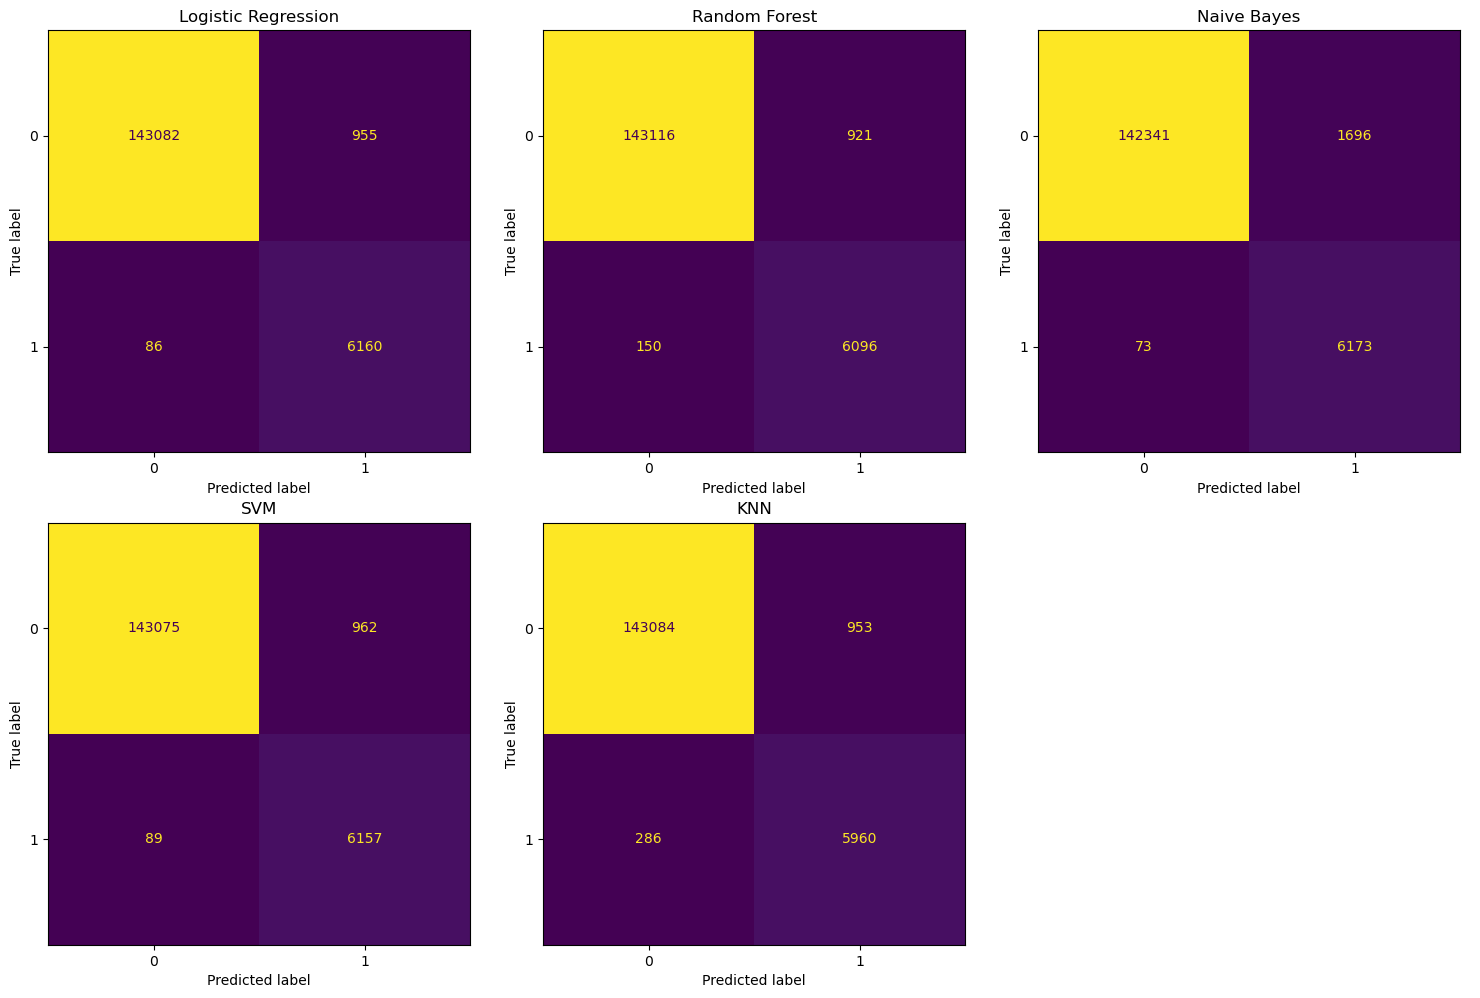

In [27]:
# Ustawienia siatki
columns = 3  # Liczba kolumn w układzie
num_models = len(models_dict)  # Liczba modeli
rows = math.ceil(num_models / columns)  # Liczba wierszy

# Tworzenie subplotów
fig, axes = plt.subplots(rows, columns, figsize=(15, rows * 5), squeeze=False)

# Iteracja po modelach i rysowanie macierzy konfuzji
for idx, (model_name, model) in enumerate(models_dict.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    row, col = divmod(idx, columns)  # Pozycja w siatce
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[row, col], colorbar=False)
    axes[row, col].set_title(model_name)

# Wyłączanie pustych osi, jeśli jest ich więcej niż modeli
for i in range(num_models, rows * columns):
    row, col = divmod(i, columns)
    axes[row, col].axis('off')

# Dostosowanie układu
plt.tight_layout()
plt.show()

Analiza macierzy konfuzji dla każdego z modeli wskazuje, że wszystkie modele świetnie sobie radzą z poprawnym identyfikowaniem użytkowników, którzy kupią i nie kupią. Model Naive Bayes zidentyfikował więcej błędnych klasyfikacji użytkowników, którzy nie kupili niż reszta modeli. Natomiast KNN zidentyfikował więcej błędnych klasyfikacji użytkowników, którzy kupili (FN: 286).

Praca nad Random Forest 

W dalszym etapie dokonamy optymalizacji hiperparametrów, aby zmniejszyć liczbę False Negatives, czyli liczby użytkowników, którzy kupili produkt, ale zostali błędnie sklasyfikowani jako niekupujący

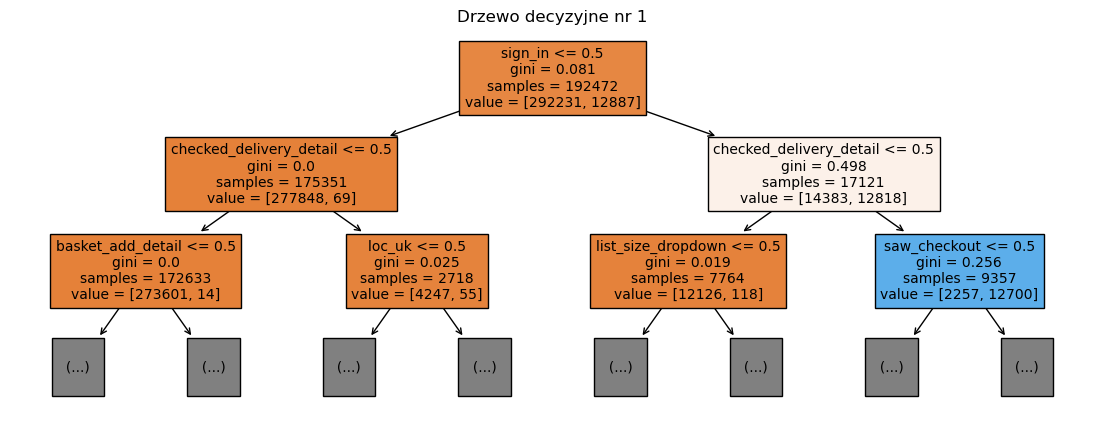

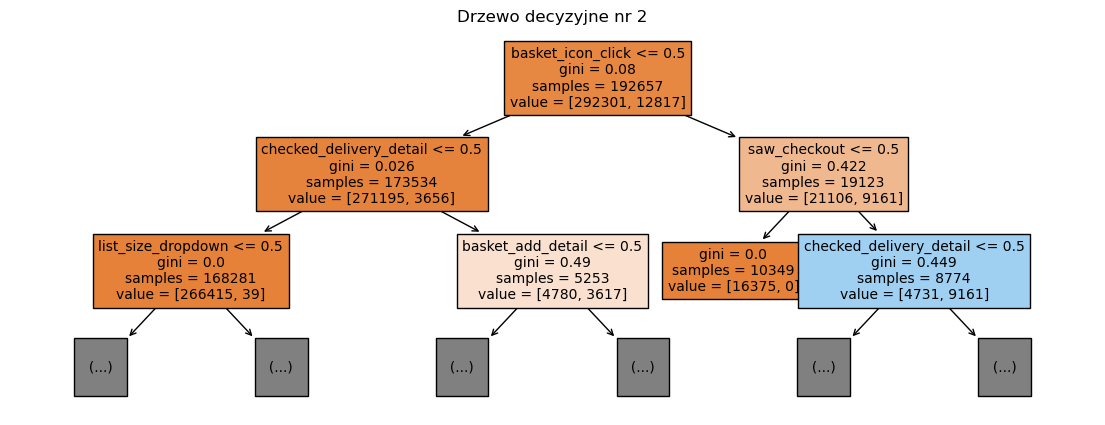

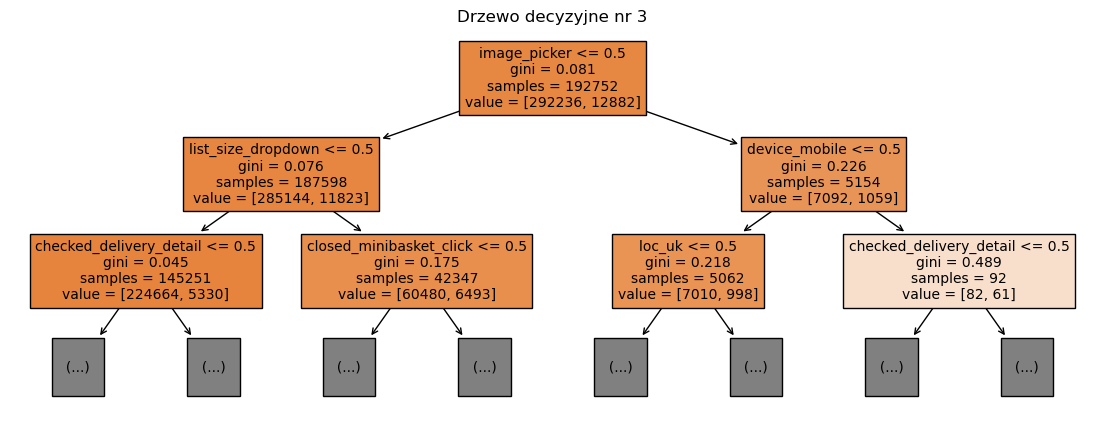

In [37]:
# Rysowanie pierwszego drzewa z lasu losowego
for i in range(3):
    tree = random_forest_model.estimators_[i]
    plt.figure(figsize=(14, 5))
    plot_tree(tree, 
              feature_names=X_train.columns, 
              filled=True, 
              max_depth=2, 
              fontsize=10)
    plt.title(f"Drzewo decyzyjne nr {i+1}")
    plt.show()

In [29]:
# Hyperparameter Tuning

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

# Tworzenie Random Forest Classifier
rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x33adfd6d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x341fbb390>})

In [30]:
# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 9, 'n_estimators': 342}


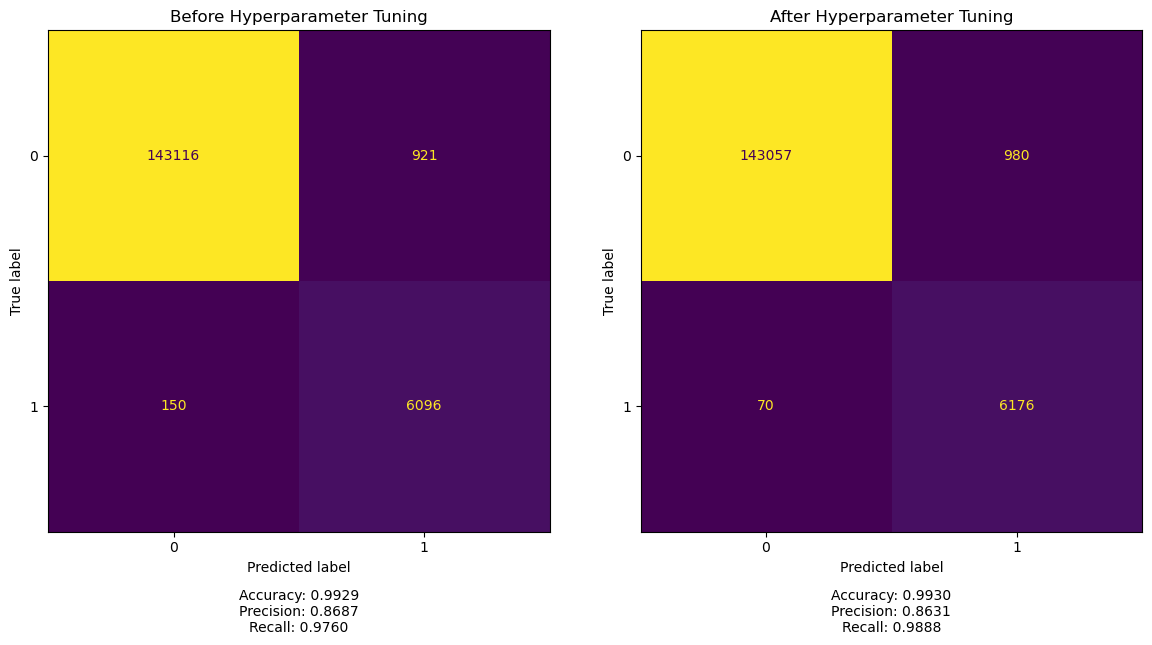

In [ ]:
# Random Forest before hyperparameter tuning
y_pred_rf_before = random_forest_model.predict(X_test)
cm_before = confusion_matrix(y_test, y_pred_rf_before)
accuracy_rf_before = accuracy_score(y_test, y_pred_rf_before)
precision_rf_before = precision_score(y_test, y_pred_rf_before)
recall_rf_before = recall_score(y_test, y_pred_rf_before)

# Random Forest after hyperparameter tuning
y_pred_rf_after = best_rf.predict(X_test)
cm_after = confusion_matrix(y_test, y_pred_rf_after)
accuracy_rf_after = accuracy_score(y_test, y_pred_rf_after)
precision_rf_after = precision_score(y_test, y_pred_rf_after)
recall_rf_after = recall_score(y_test, y_pred_rf_after)

# Tworzenie wykresów w 2 kolumnach
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Macierz konfuzji przed tuningiem
disp_before = ConfusionMatrixDisplay(confusion_matrix=cm_before)
disp_before.plot(ax=axes[0], colorbar=False)
axes[0].set_title("Before Hyperparameter Tuning")
axes[0].text(0.5, -0.2, f"Accuracy: {accuracy_rf_before:.4f}\n"
                        f"Precision: {precision_rf_before:.4f}\n"
                        f"Recall: {recall_rf_before:.4f}",
             ha='center', transform=axes[0].transAxes)

# Macierz konfuzji po tuningu
disp_after = ConfusionMatrixDisplay(confusion_matrix=cm_after)
disp_after.plot(ax=axes[1], colorbar=False)
axes[1].set_title("After Hyperparameter Tuning")
axes[1].text(0.5, -0.2, f"Accuracy: {accuracy_rf_after:.4f}\n"
                        f"Precision: {precision_rf_after:.4f}\n"
                        f"Recall: {recall_rf_after:.4f}",
             ha='center', transform=axes[1].transAxes)

# Dostosowanie układu
plt.tight_layout()
plt.show()


Po dokonaniu optymalizacji hiperparametrów widzimy nieznaczny wzrost metryki Recall z 0.97 do 0.98. W macierzy konfuzji widzimy, ze liczba False Negatives oraz True Negatives zmalała. Natomiast liczba True Positives oraz False Positives zwiększyła się.

<Axes: >

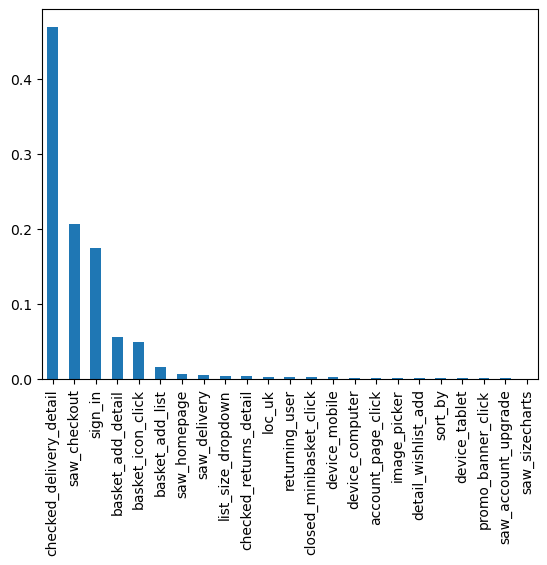

In [32]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

Analizując feature importances widzimy, ze największy wpływ ma parametr checked_delivery_detail, następnie saw_checkout oraz sign_in. Jest to ważna informacja, które czynniki powinniśmy w pierwszej kolejności optymalizować na stronie.

Podsumowanie

Każdy z modeli bardzo dobrze sprawdza się na naszym datasecie. Próby optymalizacji hiperparametrów nieznacznie poprawiają niektóre aspekty. Czy warto dokonać optymalizacji, zależy od decyzji biznesowych.